# STA130 Week 03 Homework

**Name:** Varak Tanashian

**Date:** September 26th, 2024

**Assignment:** Week 03 Homework

---

## Course Information
- **Course:** STA130 - An Introduction to Statistical Reasoning and Data Science
- **Instructor:** Prof. Scott Schwartz 
- **Term:** Fall 2024

---

*This notebook contains my solutions and work for the Week 02 Homework assignment. The required Chatbot logs are included as well*

##### ChatGPT Summary: Found at the bottom of this notebook  
##### Chat Links 
- 

### Question 1

In [1]:
import plotly.graph_objects as go
import seaborn as sns
import pandas as pd
import numpy as np

# Load penguins dataset from seaborn
penguins = sns.load_dataset("penguins")

# Create a figure
fig = go.Figure()

# Define colors for each species
colors = {'Adelie': 'rgba(102, 197, 204, 0.6)', 
          'Chinstrap': 'rgba(246, 207, 113, 0.6)', 
          'Gentoo': 'rgba(248, 156, 116, 0.6)'}

# Loop through each species and add histograms and lines
for species in penguins['species'].unique():
    df_species = penguins[penguins['species'] == species]
    
    # Descriptive statistics
    median_val = df_species['flipper_length_mm'].median()

    # Add histogram for this species
    fig.add_trace(go.Histogram(
        x=df_species['flipper_length_mm'],
        name=species,
        marker_color=colors[species],
        opacity=0.7
    ))

    # Add median line
    fig.add_vline(x=median_val, 
                  line=dict(color=colors[species].replace('0.6', '1'), width=2, dash='dash'), 
                  annotation_text=f'Median ({species})', 
                  annotation_position="top left")

# Update layout
fig.update_layout(
    title="Flipper Length Distribution by Species",
    xaxis_title="Flipper Length (mm)",
    yaxis_title="Count",
    barmode='overlay',
    legend_title="Species",
    plot_bgcolor='rgba(240,240,240,0.8)',
    font=dict(family="Arial", size=12)
)

# Update x-axis
fig.update_xaxes(range=[170, 235])

# Show figure
fig.show(renderer="png")


### Question 2

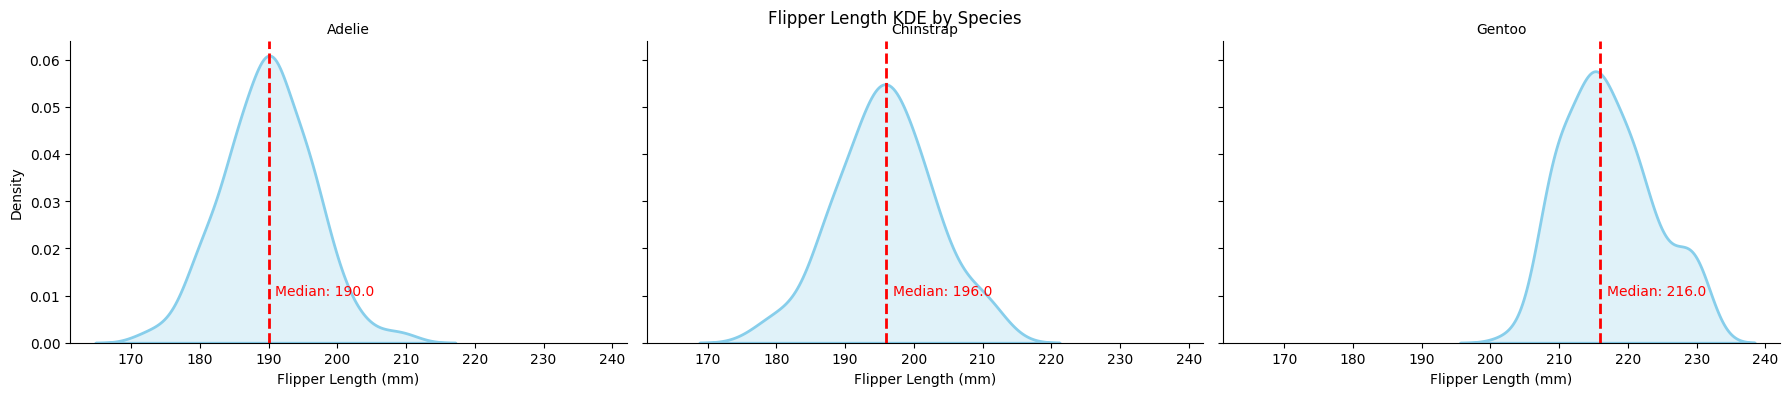

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the penguins dataset
penguins = sns.load_dataset("penguins")

# Create a FacetGrid to plot each species in a row
g = sns.FacetGrid(penguins, col="species", col_wrap=3, height=4, aspect=1.5)

# Plot KDE for each species
g.map(sns.kdeplot, "flipper_length_mm", fill=True, color="skyblue", linewidth=2)

# Add median lines
for ax, species in zip(g.axes.flat, penguins['species'].unique()):
    # Calculate median
    median_val = penguins[penguins['species'] == species]['flipper_length_mm'].median()
    
    # Add vertical line for the median
    ax.axvline(median_val, color='red', linestyle='--', lw=2)
    ax.text(median_val + 1, 0.01, f'Median: {median_val:.1f}', color='red')

# Customize the overall layout
g.set_axis_labels("Flipper Length (mm)", "Density")
g.set_titles("{col_name}")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Flipper Length KDE by Species')

plt.show(renderer="png")


### Question 3

#### My Analysis
##### Box Plots
- Provide a summary of a dataset's distribution using five key statistics: the minimum, first quartile (Q1), median (Q2), third quartile (Q3), and maximum. 
- Highlight outliers and show the spread of the data.

**Strengths**: They are great for comparing distributions across multiple categories and are effective in visualizing the central tendency and variability. Box plots are also concise and easy to interpret.

##### Histograms
- Histograms display the frequency distribution of a dataset by dividing it into bins and counting the number of observations in each bin. 
- The x-axis represents the value ranges, while the y-axis shows the frequency.

**Strengths**: They provide a clear picture of the shape of the data distribution, revealing skewness and modality. Histograms are excellent for visualizing large datasets and understanding the overall distribution patterns.

##### Kernel Density Estimators (KDE)
- KDEs are a smooth, continuous estimate of the probability density function of a random variable. 
- They create a curve based on the data points, providing a more nuanced view of the distribution compared to histograms.

**Strengths**: KDEs are useful for identifying underlying distributions without the binning artifacts of histograms. They can show multiple peaks and provide a visually appealing representation of data density.

In summary, box plots excel in summarizing key statistics and comparing categories, while histograms effectively depict the shape and frequency of data. KDEs offer a smooth alternative that highlights the distribution's nuances. Choosing between them depends on the analysis goals: use box plots for summary comparisons, histograms for frequency insights, and KDEs for smooth distribution views. Each method has its strengths, making them complementary tools in data visualization. I think, in most cases, histograms are easier to understand visually, KDEs better demonstrate an overlap, and box plots give the most detail.

#### What ChatGPT Said
```
What I Agree With:
Box Plots: I agree that box plots are effective for summarizing key statistics (min, Q1, median, Q3, max) and for comparing distributions across categories. They also clearly highlight outliers, making them a strong choice for spotting anomalies and quickly gauging the central tendency and spread of a dataset.

Histograms: The analysis correctly points out that histograms are excellent for understanding the shape of data, especially in terms of skewness and modality. They're a go-to for showing how often data points fall within different ranges and are particularly useful for large datasets.

KDE: I agree with the analysis that KDEs offer a smooth, continuous view of data distribution and avoid the binning artifacts of histograms. KDEs excel in revealing the underlying probability density, particularly when you want to highlight subtle patterns like multiple peaks (i.e., multimodality).

What's Missing:
Limitations of Each Method: The analysis could benefit from explicitly mentioning the weaknesses of each method. For example:

Box Plots: While concise, they can sometimes hide important details about the distribution's shape, especially when comparing small datasets. They do not give insight into the distribution's modality (e.g., multiple peaks).
Histograms: The choice of bin width can greatly influence the appearance and interpretation of histograms. Poor binning may obscure important details (such as bimodality) or introduce visual noise.
KDE: While smooth, KDEs rely on choosing an appropriate bandwidth, which can be tricky. A bandwidth that’s too small leads to an overfitted plot, while too large can smooth out important features like multimodality.
Sample Size Sensitivity:

Histograms and KDEs: Both methods are heavily dependent on the amount of data. Histograms with small sample sizes can look erratic, while KDEs with insufficient data can give misleading density estimates.
Box Plots: Box plots, on the other hand, are robust to smaller sample sizes since they focus on summary statistics rather than the entire distribution.
Handling of Overlapping Distributions:

The analysis touches on the idea that KDEs are good at visualizing overlapping distributions, which is true. However, this can be more explicitly compared to box plots, which handle overlapping categories by visualizing side-by-side, and histograms, which can also show overlap with multiple transparent bars.
Multimodality:

The analysis mentions that histograms and KDEs reveal skewness and modality. However, a deeper discussion could explain that KDEs are particularly well-suited for showing multimodal distributions, which are not always clear in histograms (due to binning) or box plots (since they summarize the data into percentiles).
What I Would Modify:
Clarity in Strengths: While the strengths of each method are well stated, I'd balance the analysis by also discussing the limitations.

Context of Use: You might emphasize when to use each visualization based on specific types of analysis. For instance:

Use box plots when comparing across groups or when summarizing distributions is important, especially with smaller sample sizes.
Use histograms when you want to visually count how data points are distributed across a range of values.
Use KDEs when you're interested in visualizing the smooth shape of the data and possibly detecting hidden features in larger datasets.
Visual Complexity: KDEs can sometimes be visually complex and harder to interpret for audiences unfamiliar with probability density functions. In contrast, histograms and box plots tend to be more intuitive for general audiences.

Final Thoughts:
The analysis provides a good foundation, but I would add details about the limitations, specific contexts of use, and visual complexity of each method. I agree with the conclusion that histograms are often easier to understand, KDEs are useful for revealing distribution overlaps, and box plots offer detailed summaries. However, it’s important to stress that the choice should also depend on the audience's familiarity with each method and the nature of the data.
```

### Question 4

In [9]:
from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np
import pandas as pd

# Generate datasets
n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

# Store datasets in a dictionary
datasets = {
    'A': data1,
    'B': data2,
    'C': data3,
    'D': data4
}

# Calculate means, medians, and variances
means = {key: np.mean(value) for key, value in datasets.items()}
medians = {key: np.median(value) for key, value in datasets.items()}
variances = {key: np.var(value, ddof=1) for key, value in datasets.items()}  # Use ddof=1 for sample variance

# Create a DataFrame for a compact output
summary_df = pd.DataFrame({
    'Mean': means,
    'Median': medians,
    'Variance': variances
})

# Print the summary DataFrame
print(summary_df)

# Create a row of histograms
fig = make_subplots(rows=1, cols=4, subplot_titles=['A', 'B', 'C', 'D'])

# Plot histograms and add median lines
for idx, (key, data) in enumerate(datasets.items(), 1):
    fig.add_trace(go.Histogram(x=data, name=key, nbinsx=30, marker=dict(line=dict(color='black', width=1))), row=1, col=idx)
    
    # Add a vertical line for the median without annotation
    fig.add_vline(x=medians[key], line=dict(color='red', width=2, dash='dash'), row=1, col=idx)

# Update layout
fig.update_layout(height=400, width=900, title_text="Histograms with Median Lines", showlegend=False)
fig.update_xaxes(title_text="Value", range=[-0.5, 10.5])

# Show the figure

# fig.show()
fig.show(renderer="png")


      Means   Medians  Variances
A  4.918758  4.954629   8.369779
B  4.997246  4.995228   2.363421
C  5.001254  4.343274   9.221268
D  5.979578  5.977909   0.243280


**1: Which datasets have similar means and similar variances**  
> *A* and *C* have similar means and similar variances.
<br>
<br>

**2: Which datasets have similar means but quite different variances**  
> *B* and *C* have (somewhat) similar means but very different variances,  
> *B* and *A* have (somewhat) similar means but different variances.
<br>
<br>

**3: Which datasets have similar variances but quite different means**  
> None.
<br>
<br>

**4: Which datasets have quite different means and quite different variances**  
> *B* and *D*,  
> *C* and *D*.


### Question 5

In [1]:

from scipy import stats
import pandas as pd
import numpy as np
import plotly.express as px
  
sample1 = stats.gamma(a=2,scale=2).rvs(size=1000)
sample2 = -stats.gamma(a=2,scale=2).rvs(size=1000)

# Right-skewed sample (already generated)
sample1_mean = sample1.mean()
sample1_median = np.quantile(sample1, [0.5])

# Plot right-skewed distribution with mean and median annotations
fig1 = px.histogram(pd.DataFrame({'data': sample1}), x="data")
fig1.add_vline(x=sample1_mean, line_width=3, line_dash="dash", line_color="green", annotation_text="Mean", annotation_position="top left")
fig1.add_vline(x=sample1_median[0], line_width=3, line_dash="dash", line_color="red", annotation_text="Median", annotation_position="top left")
fig1.show()
# fig1.show(renderer="png")

# Left-skewed sample
sample2_mean = sample2.mean()
sample2_median = np.quantile(sample2, [0.5])

# Plot left-skewed distribution with mean and median annotations
fig2 = px.histogram(pd.DataFrame({'data': sample2}), x="data")
fig2.add_vline(x=sample2_mean, line_width=3, line_dash="dash", line_color="green", annotation_text="Mean", annotation_position="top right")
fig2.add_vline(x=sample2_median[0], line_width=3, line_dash="dash", line_color="red", annotation_text="Median", annotation_position="top right")
fig2.show()
# fig2.show(renderer="png")


##### General Relationship between Mean, Median, and Skewness

##### Right Skewness (Positively Skewed)

* In a right-skewed distribution, the tail on the right-hand side is longer. 
* The mean is typically greater than the median because the extreme high values pull the mean to the right.

> Mean > Median.

##### Left Skewness (Negatively Skewed)

* In a left-skewed distribution, the tail on the left-hand side is longer. 
* The mean is usually less than the median as the extreme low values pull the mean to the left.

> Mean < Median.

##### Why This Happens

The mean is sensitive to outliers and extreme values. In skewed distributions, extreme values in the tail shift the mean towards the tail, while the median, being the middle value, remains less affected by extreme values. This is why the mean moves toward the tail, while the median tends to stay closer to the center of the data.

### Question 6

### Question 7

### Question 8

### Question 9


---

### Chatbot Summary

